In [7]:
#数据读取
import pandas as pd
reviews = pd.read_csv('Reviews.csv')
print(reviews.shape)
reviews.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
reviews.drop('ProfileName',axis=1,inplace=True)
reviews.isnull().sum() #缺失值

Id                         0
ProductId                  0
UserId                     0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
#缺失值处理
reviews.dropna(inplace=True)
print(reviews.shape)

(568427, 9)


In [10]:
#重复值
reviews.duplicated(subset=['Text']).sum()

np.int64(174851)

In [11]:
#重复值处理
reviews.drop_duplicates(subset=['Text'],keep='first',inplace=True)
print(reviews.shape)

(393576, 9)


In [12]:
#异常值
reviews[reviews["HelpfulnessNumerator"]>reviews["HelpfulnessDenominator"]]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [13]:
#异常值处理
reviews.drop([44736,64421],inplace=True) 

In [14]:
# 查看剩余的异常值
reviews[reviews["HelpfulnessNumerator"]>reviews["HelpfulnessDenominator"]]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [15]:
reviews.reset_index(drop=True,inplace=True)

In [16]:
#时间数据
reviews['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
393569    1299628800
393570    1331251200
393571    1329782400
393572    1331596800
393573    1338422400
Name: Time, Length: 393574, dtype: int64

In [17]:
#时间类型数据进行处理
reviews['Time'] = pd.to_datetime(reviews['Time'],unit='s')
reviews['Time'] 

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
393569   2011-03-09
393570   2012-03-09
393571   2012-02-21
393572   2012-03-13
393573   2012-05-31
Name: Time, Length: 393574, dtype: datetime64[ns]

In [18]:
#年份数据提取
reviews['Time'].dt.year

0         2011
1         2012
2         2008
3         2011
4         2012
          ... 
393569    2011
393570    2012
393571    2012
393572    2012
393573    2012
Name: Time, Length: 393574, dtype: int32

In [19]:
#添加新列
reviews['year'] = reviews['Time'].dt.year
reviews.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,2012


In [20]:
#文本数据处理
#观察某一条
reviews['Text'][30]

'This offer is a great price and a great taste, thanks Amazon for selling this product.<br /><br />Staral'

In [21]:
#将所有字母转换为小写字母
reviews["Text"].str.lower()

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price.  there was a wid...
                                ...                        
393569    great for sesame chicken..this is a good if no...
393570    i'm disappointed with the flavor. the chocolat...
393571    these stars are small, so you can give 10-15 o...
393572    these are the best treats for training and rew...
393573    i am very satisfied ,product is as advertised,...
Name: Text, Length: 393574, dtype: object

In [22]:
reviews["Text"]=reviews["Text"].str.lower()
reviews["Summary"] = reviews["Summary"].str.lower()

In [23]:
#删除非英文字符
import re
re.sub(r'[^a-z]+', ' ', reviews['Text'][30])

'this offer is a great price and a great taste thanks amazon for selling this product br br staral'

In [24]:
reviews['Text_cl'] = reviews['Text'].apply(lambda x: re.sub(r'[^a-z]+', ' ', x))
reviews['Summary'] = reviews['Summary'].apply(lambda x: re.sub(r'[^a-z]+', ' ', x))

In [25]:
#去停用词
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [27]:
#去停用词
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words()
sw = stopwords.words('english')
sw = sw+['br']
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a1523\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
reviews["Text_cl"] =reviews["Text_cl"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw or x == "not"))
reviews["Summary"] =reviews["Summary"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw or x == "not"))
reviews['Text_cl']

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanuts p...
2         confection around centuries light pillowy citr...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
393569    great sesame chicken good not better resturant...
393570    disappointed flavor chocolate notes especially...
393571    stars small give one training session tried tr...
393572    best treats training rewarding dog good groomi...
393573    satisfied product advertised use cereal raw vi...
Name: Text_cl, Length: 393574, dtype: object

In [29]:
#构造评论有用性特征
import numpy as np
np.where(reviews['HelpfulnessDenominator']==0,np.nan,reviews['HelpfulnessNumerator']/reviews['HelpfulnessDenominator'])

array([ 1., nan,  1., ...,  1.,  1., nan], shape=(393574,))

In [30]:
result = np.where(reviews['HelpfulnessDenominator']==0,np.nan,reviews['HelpfulnessNumerator']/reviews['HelpfulnessDenominator'])
reviews['Usefulness'] = np.where(result>0.5,'useful',np.where(np.isnan(result),'unknown','useless'))
reviews

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,year,Text_cl,Usefulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...,2011,bought several vitality canned dog food produc...,useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not advertised,product arrived labeled as jumbo salted peanut...,2012,product arrived labeled jumbo salted peanuts p...,unknown
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says,this is a confection that has been around a fe...,2008,confection around centuries light pillowy citr...,useful
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...,2011,looking secret ingredient robitussin believe f...,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy at a great price. there was a wid...,2012,great taffy great price wide assortment yummy ...,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
393569,568450,B001EO7N10,A28KG5XORO54AY,0,0,5,2011-03-09,not without,great for sesame chicken..this is a good if no...,2011,great sesame chicken good not better resturant...,unknown
393570,568451,B003S1WTCU,A3I8AFVPEE8KI5,0,0,2,2012-03-09,disappointed,i'm disappointed with the flavor. the chocolat...,2012,disappointed flavor chocolate notes especially...,unknown
393571,568452,B004I613EE,A121AA1GQV751Z,2,2,5,2012-02-21,perfect maltipoo,"these stars are small, so you can give 10-15 o...",2012,stars small give one training session tried tr...,useful
393572,568453,B004I613EE,A3IBEVCTXKNOH,1,1,5,2012-03-13,favorite training reward treat,these are the best treats for training and rew...,2012,best treats training rewarding dog good groomi...,useful


In [31]:
###数据可视化###
##评分占比分析
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHEI']

In [32]:
reviews['Score'].value_counts()

Score
5    250715
4     56041
1     36275
3     29752
2     20791
Name: count, dtype: int64

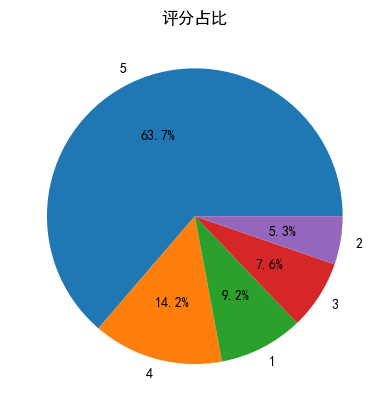

In [33]:
tmp1 = reviews['Score'].value_counts()
plt.pie(tmp1,labels=tmp1.index,autopct='%1.1f%%')
plt.title('评分占比')
plt.show()

In [34]:
##评论有用性分析
#评论有用性的占比环形图
reviews['Usefulness'].value_counts()

Usefulness
unknown    184495
useful     161207
useless     47872
Name: count, dtype: int64

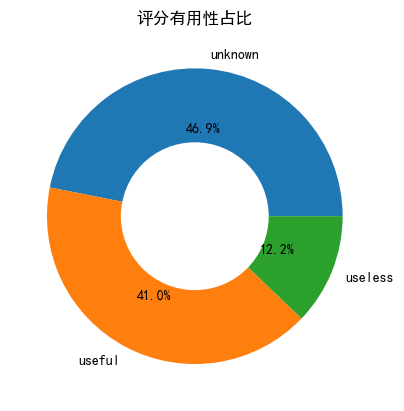

In [35]:
tmp2 = reviews['Usefulness'].value_counts()
plt.pie(tmp2,labels=tmp2.index,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf().gca().add_artist(centre_circle)
plt.title('评分有用性占比')
plt.show()

In [36]:
#各评分中评论有用性分布条形图
reviews[['Score','Usefulness']].groupby(by=['Score','Usefulness'],as_index=False).agg(count=('Usefulness','count'))

,Score,Usefulness,count
0,1,unknown,9167
1,1,useful,13788
2,1,useless,13320
3,2,unknown,7572
4,2,useful,7229
5,2,useless,5990
6,3,unknown,13113
7,3,useful,10059
8,3,useless,6580
9,4,unknown,28837


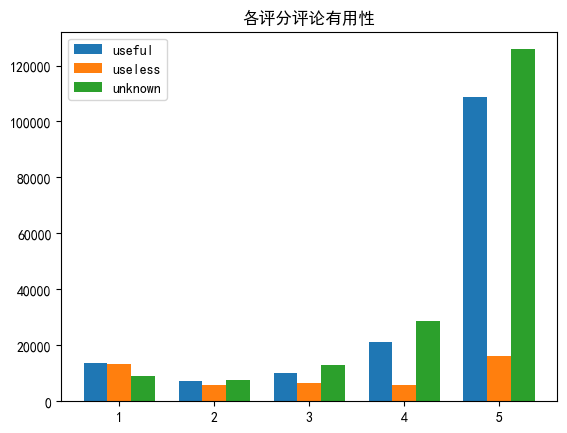

In [37]:
tmp3 = reviews[['Score','Usefulness']].groupby(by=['Score','Usefulness'],as_index=False).agg(count=('Usefulness','count'))
x = tmp3['Score'].unique()
y_useful = tmp3[tmp3['Usefulness']=='useful']['count'].values
y_useless = tmp3[tmp3['Usefulness']=='useless']['count'].values
y_unknown = tmp3[tmp3['Usefulness']=='unknown']['count'].values

fig,ax = plt.subplots()
width = 0.25
rects1 = ax.bar(x-width,y_useful,width,label='useful')
rects2 = ax.bar(x,y_useless,width,label='useless')
rects3 = ax.bar(x+width,y_unknown,width,label='unknown')

ax.set_title('各评分评论有用性')
ax.legend()
plt.show()

In [38]:
##历年评分星级和评论趋势分析
reviews[['year','Text']].groupby(by='year',as_index=False).count()

,year,Text
0,1999,4
1,2000,17
2,2001,8
3,2002,33
4,2003,99
5,2004,439
6,2005,1059
7,2006,4722
8,2007,15751
9,2008,23098


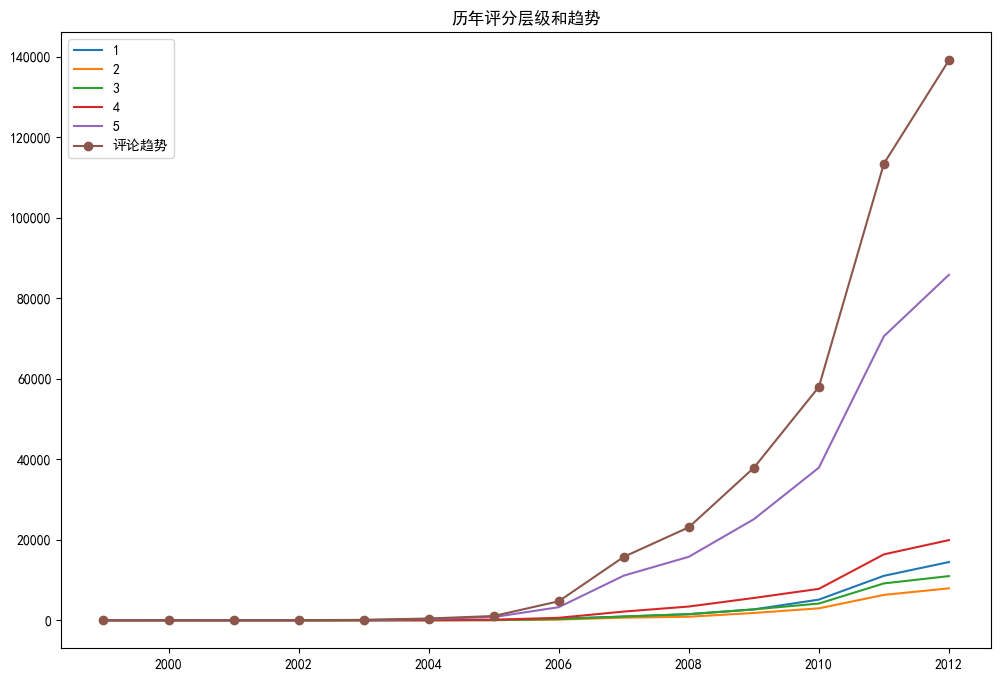

In [39]:
tmp4 = reviews[['year','Text']].groupby(by='year',as_index=False).count()
tmp4_1 = reviews[['year','Score']].groupby(by=['year','Score'],as_index=False).size()
pivot_data = tmp4_1.pivot(index='year',columns='Score',values='size').fillna(0)

plt.figure(figsize=(12,8))
for i in pivot_data.columns:
    plt.plot(pivot_data.index,pivot_data[i],label=f'{i}')
plt.plot(tmp4['year'],tmp4['Text'],label='评论趋势',marker='o')
plt.title('历年评分层级和趋势')
plt.legend()
plt.show()

In [40]:
##用户情况分析
reviews['UserId'].value_counts()

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    268
A281NPSIMI1C2R    242
A1Z54EM24Y40LL    211
A1YUL9PCJR3JTY    194
                 ... 
A2F25C6QCKJ3HL      1
A7VLVCQJIROTF       1
AW7HIV8I53FE4       1
A3JRGQVEQN31IQ      1
ADT0SRK1MGOEU       1
Name: count, Length: 256041, dtype: int64

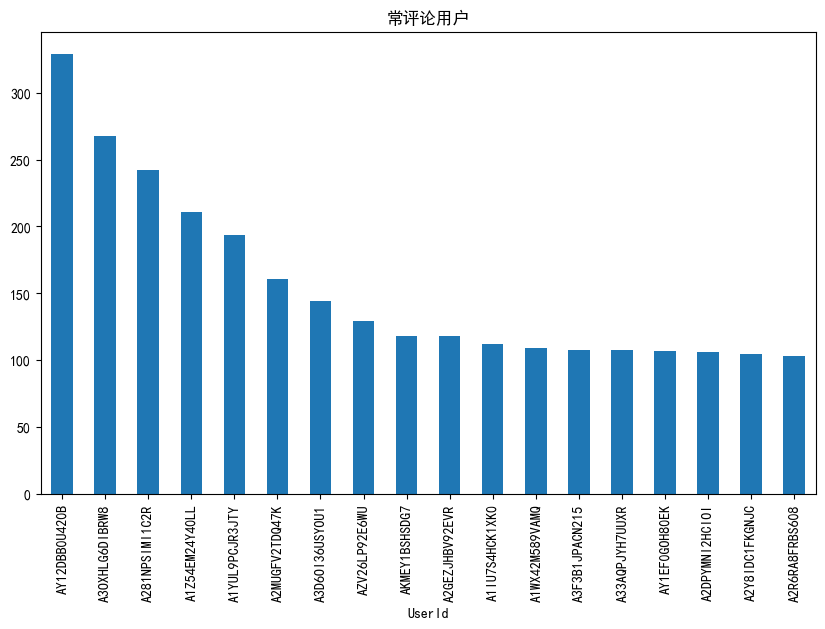

In [41]:
user_count = reviews['UserId'].value_counts()
selected_user = user_count[user_count>100]

plt.figure(figsize=(10,6))
selected_user.plot(kind='bar')
plt.title('常评论用户')
plt.show()

In [42]:
##评论内容分析
#各评分的关键词词云图

from wordcloud import WordCloud
from collections import Counter

text=reviews.loc[reviews['Score']==1,'Summary']
Counter(" ".join(text).split()).most_common()

[('not', 5913),
 ('taste', 1539),
 ('like', 1370),
 ('product', 1310),
 ('good', 1195),
 ('bad', 1124),
 ('buy', 941),
 ('horrible', 844),
 ('terrible', 836),
 ('coffee', 809),
 ('awful', 752),
 ('disappointed', 704),
 ('flavor', 665),
 ('tastes', 626),
 ('price', 616),
 ('money', 607),
 ('worst', 607),
 ('yuck', 605),
 ('beware', 595),
 ('great', 557),
 ('made', 546),
 ('tea', 522),
 ('ever', 516),
 ('poor', 508),
 ('food', 497),
 ('dog', 488),
 ('stale', 485),
 ('waste', 460),
 ('quality', 422),
 ('disgusting', 404),
 ('one', 392),
 ('really', 388),
 ('gross', 349),
 ('nasty', 348),
 ('china', 348),
 ('wrong', 343),
 ('way', 339),
 ('sugar', 335),
 ('old', 333),
 ('disappointing', 304),
 ('chocolate', 297),
 ('much', 293),
 ('amazon', 289),
 ('work', 285),
 ('item', 283),
 ('expensive', 278),
 ('never', 276),
 ('rip', 270),
 ('sweet', 270),
 ('free', 269),
 ('overpriced', 262),
 ('worth', 259),
 ('packaging', 256),
 ('stuff', 251),
 ('cat', 248),
 ('order', 248),
 ('new', 246),
 ('ea

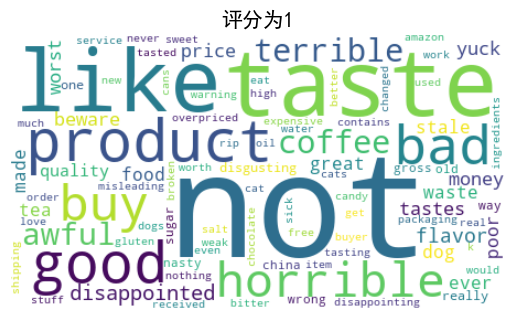

In [43]:
text=reviews.loc[reviews['Score']==1,'Summary']
Counter(" ".join(text).split()).most_common()
common_words = Counter(" ".join(text).split()).most_common()
wordcloud = WordCloud(width=450, height=250, background_color="white", min_font_size=10).generate_from_frequencies(dict(common_words))
    
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('评分为1', fontsize=15)
plt.show()

In [44]:
def getWordCloud(text, title, i=None):
    common_words = Counter(" ".join(text).split()).most_common(i)
   
    wordcloud = WordCloud(width=450, height=250, background_color="white", min_font_size=10).generate_from_frequencies(dict(common_words))
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.show()

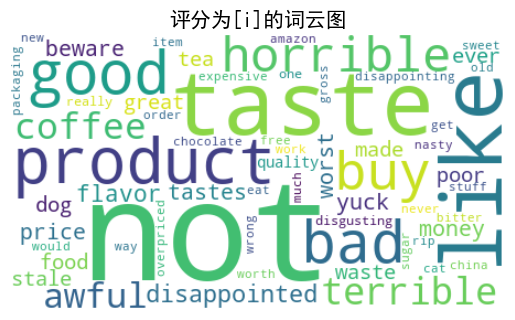

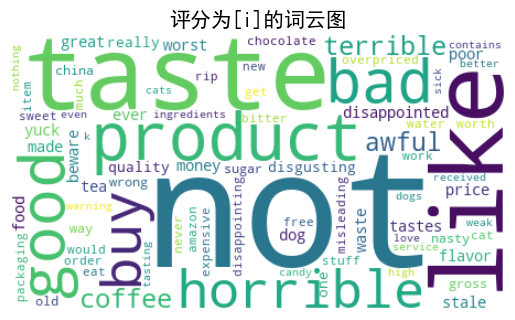

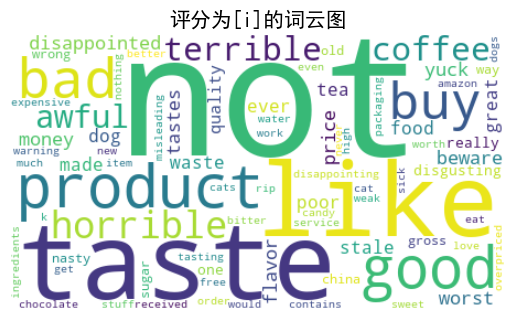

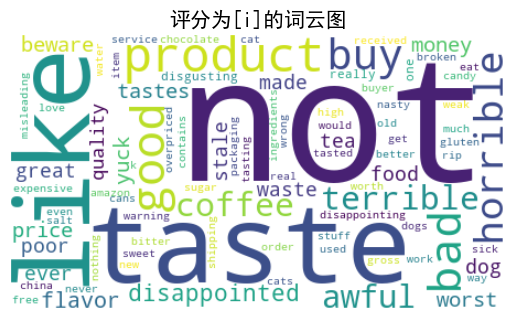

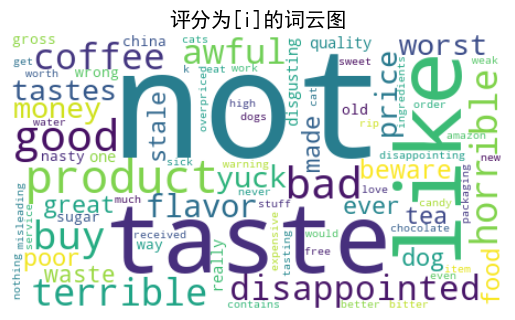

In [45]:
for i in range(1,6):
    getWordCloud(reviews.loc[reviews['Score']==1,'Summary'],f'评分为[i]的词云图')

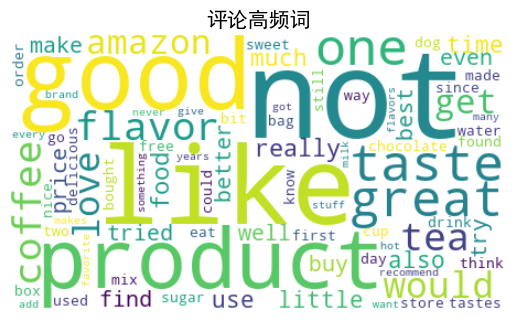

In [46]:
# 评论中前200的高频词云图
getWordCloud(reviews["Text_cl"],"评论高频词",200)

In [47]:
##热评产品分析
#前十个热评产品的评分星级分布
reviews.groupby('ProductId').size().sort_values(ascending=False)[:10]

ProductId
B007JFMH8M    909
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    565
B0013NUGDE    557
B000KV61FC    556
B000UBD88A    542
B000NMJWZO    542
B005K4Q37A    541
B0090X8IPM    530
dtype: int64

In [48]:
ind = reviews.groupby('ProductId').size().sort_values(ascending=False)[:10].index
print(ind)
reviews[reviews['ProductId'].isin(ind)]

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM'],
      dtype='object', name='ProductId')


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,year,Text_cl,Usefulness
20240,20983,B002QWP89S,A21U4DR8M6I9QN,1,1,5,2011-10-18,addictive works night coughing dogs,my 12 year old sheltie has chronic brochotitis...,2011,year old sheltie chronic brochotitis meds thre...,useful
20241,20984,B002QWP89S,A17TDUBB4Z1PEC,1,1,5,2011-10-14,genuine greenies best price,"these are genuine greenies product, not a knoc...",2011,genuine greenies product not knockoff dogs lov...,useful
20242,20985,B002QWP89S,ABQH3WAWMSMBH,1,1,5,2011-09-28,perfect little doggies,"our dogs love greenies, but of course, which d...",2011,dogs love greenies course doggies bought dashc...,useful
20243,20986,B002QWP89S,AVTY5M74VA1BJ,1,1,5,2011-09-24,dogs love greenies,"what can i say, dogs love greenies. they begg ...",2011,say dogs love greenies begg time always sit cu...,useful
20244,20987,B002QWP89S,A13TNN54ZEAUB1,1,1,5,2011-09-23,greenies review,this review is for a box of greenies lite for ...,2011,review box greenies lite dog package came quic...,useful
...,...,...,...,...,...,...,...,...,...,...,...,...
390958,563879,B007JFMH8M,A366PSH7KFLRPB,0,0,5,2012-07-29,yummy,i loved these cookies and so did my kids. you ...,2012,loved cookies kids read full review favorite p...,unknown
390959,563880,B007JFMH8M,A2KV6EYQPKJRR5,0,0,5,2012-07-28,quaker soft baked cookies,this is a great tasting cookie. it is very sof...,2012,great tasting cookie soft texture smooth usual...,unknown
390960,563881,B007JFMH8M,A3O7REI0OSV89M,0,0,4,2012-07-28,delicious,these are great for a quick snack! they are sa...,2012,great quick snack satisfying even sweet tooth ...,unknown
390961,563882,B007JFMH8M,A9JS5GQQ6GIQT,0,0,5,2012-07-28,yummy,i love the quaker soft baked cookies. the rea...,2012,love quaker soft baked cookies really soft tas...,unknown


In [49]:
tmp = reviews[reviews['ProductId'].isin(ind)]
tmp[['ProductId','Score']].groupby(by=['ProductId','Score'],as_index=False).agg(count=('Score','count'))

,ProductId,Score,count
0,B000KV61FC,1,89
1,B000KV61FC,2,78
2,B000KV61FC,3,101
3,B000KV61FC,4,91
4,B000KV61FC,5,197
5,B000NMJWZO,1,3
6,B000NMJWZO,2,3
7,B000NMJWZO,3,9
8,B000NMJWZO,4,25
9,B000NMJWZO,5,502


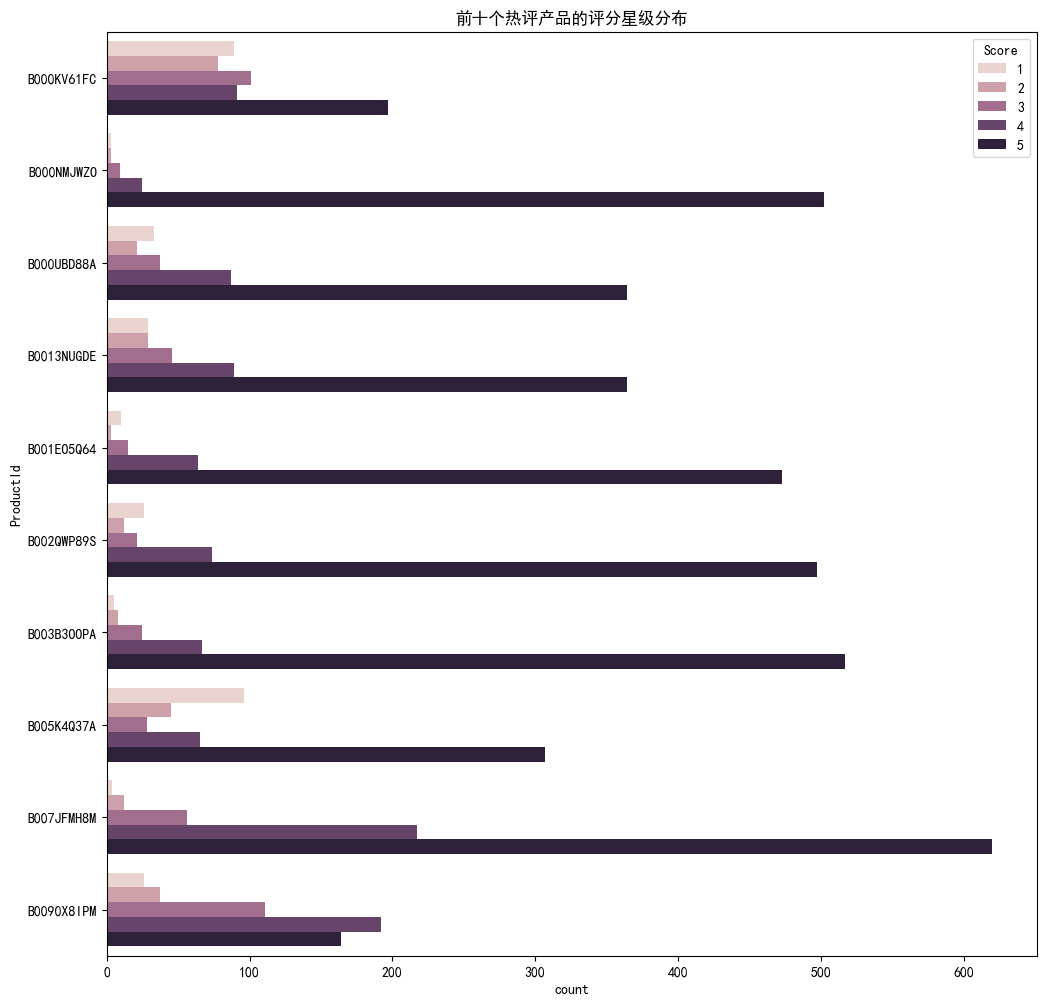

In [50]:
tmp5 = tmp[['ProductId','Score']].groupby(by=['ProductId','Score'],as_index=False).agg(count=('Score','count'))
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,12))
sns.barplot(x='count',y='ProductId',hue='Score',data=tmp5)
plt.title('前十个热评产品的评分星级分布')
plt.show()

In [51]:
# 热评第一产品分析
reviews[reviews["ProductId"]==ind[0]]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,year,Text_cl,Usefulness
390054,562971,B007JFMH8M,A368Z46FIKHSEZ,0,0,5,2012-07-28,delicious,i love these cookies! not only are they healt...,2012,love cookies not healthy taste great soft defi...,unknown
390055,562972,B007JFMH8M,A1JAPP1CXRG57A,0,0,5,2012-07-28,great anytime day,quaker soft baked oatmeal cookies with raisins...,2012,quaker soft baked oatmeal cookies raisins deli...,unknown
390056,562973,B007JFMH8M,A2Z9JNXPIEL2B9,0,0,5,2012-07-28,good,i am usually not a huge fan of oatmeal cookies...,2012,usually not huge fan oatmeal cookies literally...,unknown
390057,562974,B007JFMH8M,A31CYJQO3FL586,0,0,5,2012-07-28,quaker oats oatmeal raisin mom voxbox review c...,i participated in a product review that includ...,2012,participated product review included sample hr...,unknown
390058,562975,B007JFMH8M,A2KXQ2EKFF3K2G,0,0,5,2012-07-28,quick simple healthy snack kiddos,my kids loved these. i was very pleased to giv...,2012,kids loved pleased give kids quick go healthy ...,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
390958,563879,B007JFMH8M,A366PSH7KFLRPB,0,0,5,2012-07-29,yummy,i loved these cookies and so did my kids. you ...,2012,loved cookies kids read full review favorite p...,unknown
390959,563880,B007JFMH8M,A2KV6EYQPKJRR5,0,0,5,2012-07-28,quaker soft baked cookies,this is a great tasting cookie. it is very sof...,2012,great tasting cookie soft texture smooth usual...,unknown
390960,563881,B007JFMH8M,A3O7REI0OSV89M,0,0,4,2012-07-28,delicious,these are great for a quick snack! they are sa...,2012,great quick snack satisfying even sweet tooth ...,unknown
390961,563882,B007JFMH8M,A9JS5GQQ6GIQT,0,0,5,2012-07-28,yummy,i love the quaker soft baked cookies. the rea...,2012,love quaker soft baked cookies really soft tas...,unknown


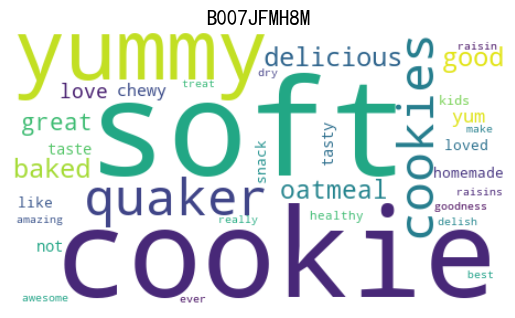

In [52]:
pro_top1 = reviews[reviews["ProductId"]==ind[0]]
getWordCloud(pro_top1["Summary"],ind[0])

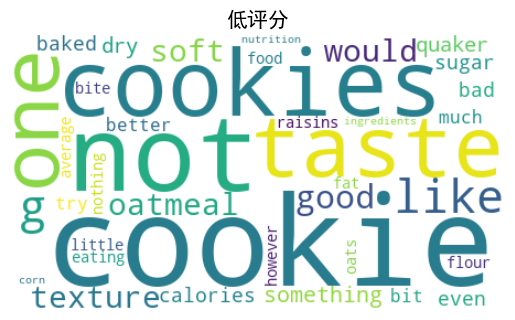

In [53]:
# 1-2 低评分
# 3 中评分
# 4-5 高评分
getWordCloud(pro_top1.loc[pro_top1["Score"]<=2,"Text_cl"],"低评分")

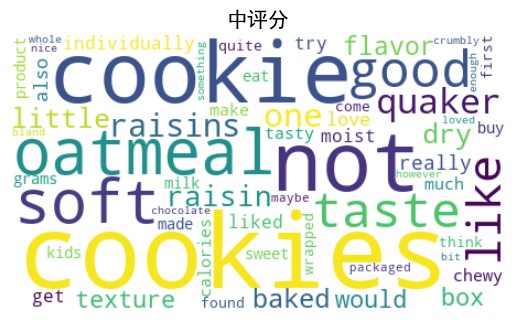

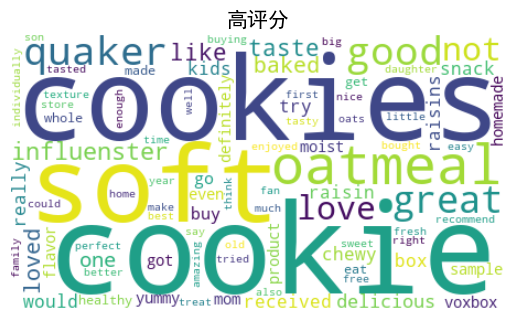

In [54]:
getWordCloud(pro_top1.loc[pro_top1["Score"]==3,"Text_cl"],"中评分")
getWordCloud(pro_top1.loc[pro_top1["Score"]>3,"Text_cl"],"高评分")

In [62]:
#情感打分
import nltk
from tqdm import tqdm
nltk.download('vader_lexicon')  # 确保这行代码在尝试使用SIA之前执行
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia=SentimentIntensityAnalyzer()
res={}

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\a1523\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
for i,row in tqdm(reviews.iterrows()):
    text=row['Text_cl']
    my_id=row['Id']
    res[my_id]=sia.polarity_scores(text)

393574it [04:45, 1379.93it/s]


In [64]:
res

{1: {'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'compound': 0.9413},
 2: {'neg': 0.092, 'neu': 0.801, 'pos': 0.106, 'compound': 0.0762},
 3: {'neg': 0.165, 'neu': 0.563, 'pos': 0.272, 'compound': 0.7926},
 4: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404},
 5: {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'compound': 0.9468},
 6: {'neg': 0.088, 'neu': 0.681, 'pos': 0.231, 'compound': 0.811},
 7: {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.9463},
 8: {'neg': 0.0, 'neu': 0.287, 'pos': 0.713, 'compound': 0.9313},
 9: {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.8176},
 11: {'neg': 0.016, 'neu': 0.733, 'pos': 0.251, 'compound': 0.9582},
 12: {'neg': 0.144, 'neu': 0.759, 'pos': 0.098, 'compound': -0.1779},
 13: {'neg': 0.055, 'neu': 0.864, 'pos': 0.082, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.205, 'pos': 0.795, 'compound': 0.9382},
 15: {'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'compound': 

In [65]:
score_data = pd.DataFrame(res).T.reset_index().rename(columns={'index':'Id'})

new_data = score_data.merge(reviews,how='left')
new_data

,Id,neg,neu,pos,compound,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,year,Text_cl,Usefulness
0,1,0.000,0.503,0.497,0.9413,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...,2011,bought several vitality canned dog food produc...,useful
1,2,0.092,0.801,0.106,0.0762,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not advertised,product arrived labeled as jumbo salted peanut...,2012,product arrived labeled jumbo salted peanuts p...,unknown
2,3,0.165,0.563,0.272,0.7926,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says,this is a confection that has been around a fe...,2008,confection around centuries light pillowy citr...,useful
3,4,0.000,0.854,0.146,0.4404,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...,2011,looking secret ingredient robitussin believe f...,useful
4,5,0.000,0.369,0.631,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy at a great price. there was a wid...,2012,great taffy great price wide assortment yummy ...,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393569,568450,0.108,0.403,0.489,0.8589,B001EO7N10,A28KG5XORO54AY,0,0,5,2011-03-09,not without,great for sesame chicken..this is a good if no...,2011,great sesame chicken good not better resturant...,unknown
393570,568451,0.290,0.554,0.156,-0.6240,B003S1WTCU,A3I8AFVPEE8KI5,0,0,2,2012-03-09,disappointed,i'm disappointed with the flavor. the chocolat...,2012,disappointed flavor chocolate notes especially...,unknown
393571,568452,0.061,0.812,0.128,0.4352,B004I613EE,A121AA1GQV751Z,2,2,5,2012-02-21,perfect maltipoo,"these stars are small, so you can give 10-15 o...",2012,stars small give one training session tried tr...,useful
393572,568453,0.062,0.283,0.654,0.9678,B004I613EE,A3IBEVCTXKNOH,1,1,5,2012-03-13,favorite training reward treat,these are the best treats for training and rew...,2012,best treats training rewarding dog good groomi...,useful


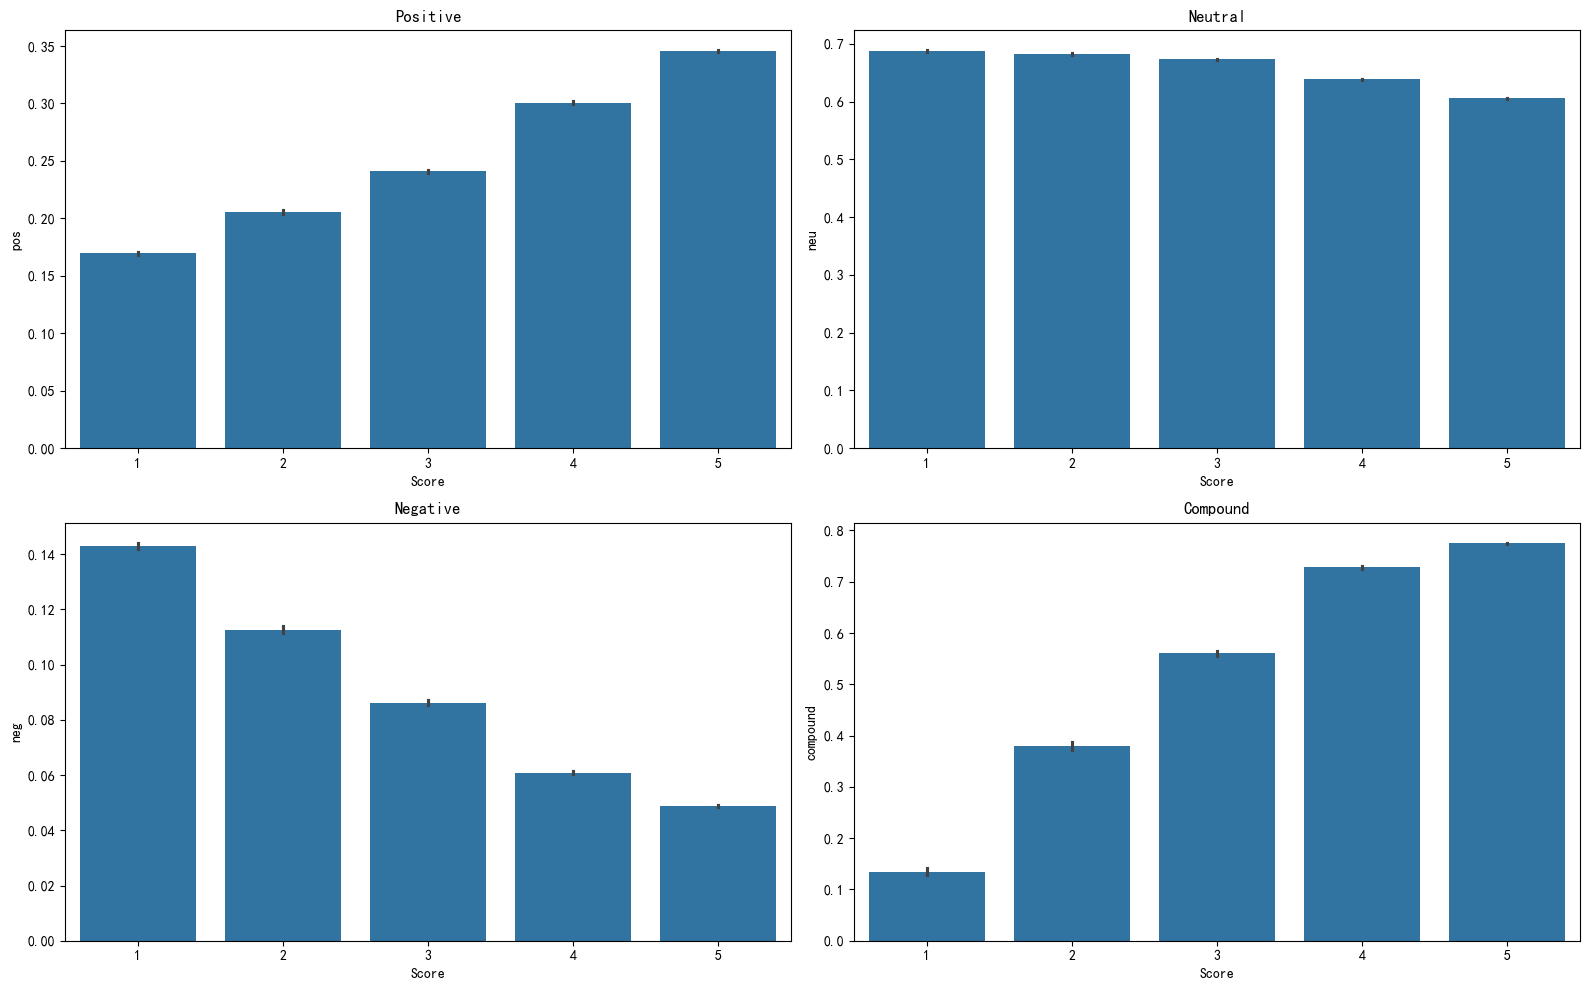

In [66]:
fig,axs = plt.subplots(2,2,figsize=(16,10))
sns.barplot(data=new_data,x="Score",y='pos',ax=axs[0,0])
sns.barplot(data=new_data,x="Score",y='neu',ax=axs[0,1])
sns.barplot(data=new_data,x="Score",y='neg',ax=axs[1,0])
sns.barplot(data=new_data,x="Score",y='compound',ax=axs[1,1])
axs[0,0].set_title('Positive')
axs[0,1].set_title('Neutral')
axs[1,0].set_title('Negative')
axs[1,1].set_title('Compound')
plt.tight_layout()
plt.show()

In [67]:
#等级划分
new_data['Sentiment'] = new_data['Score'].apply(lambda score:'Negative' if score<=2 else 'Neutral'if score==3 else 'Positive')
new_data['nltk_Sentiment'] = ['Positive' if sentiment>0 else 'Neutral' if sentiment==0 else 'Negative' for sentiment in new_data['compound']]

same_count = (new_data['Sentiment']==new_data['nltk_Sentiment']).sum()
round(same_count/len(new_data),2)

np.float64(0.79)

In [68]:
tmp6 =  new_data.loc[new_data['Sentiment']!=new_data['nltk_Sentiment'],['Text','Sentiment','nltk_Sentiment']].reset_index(drop=True)
tmp6

,Text,Sentiment,nltk_Sentiment
0,product arrived labeled as jumbo salted peanut...,Negative,Positive
1,if you are looking for the secret ingredient i...,Negative,Positive
2,one of my boys needed to lose some weight and ...,Positive,Negative
3,my cats have been happily eating felidae plati...,Negative,Positive
4,i love eating them and they are good for watch...,Negative,Positive
...,...,...,...
80984,i thought this soup would be more like a chill...,Negative,Positive
80985,i just bought this soup today at my local groc...,Negative,Positive
80986,this soup is mostly broth. although it has a k...,Negative,Positive
80987,"it is mostly broth, with the advertised 3/4 cu...",Negative,Positive


In [69]:
tmp6['Text'][4]

'i love eating them and they are good for watching tv and looking at movies! it is not too sweet. i like to transfer them to a zip lock baggie so they stay fresh so i can take my time eating them.'